**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import sympy as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import minimize_scalar

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [ ]:
# creating symbols
C = sm.symbols('C') 
k = sm.symbols('kappa')
w = sm.symbols('omega')
t = sm.symbols('tau')
G = sm.symbols('G')
v = sm.symbols('nu')
L = sm.symbols('L')
a = sm.symbols('alpha')
w_tilde = sm.symbols('omegatilde')
L_star = sm.symbols('L^*')

In [ ]:
# defining the utility function in symbols
utility = sm.log(C**a*G**(1-a))-v*(L**2)/2
utility

In [ ]:
# defining the budget constraint as an equality in symbols
consumption_constraint = sm.Eq(k+w_tilde*L,C)
consumption_constraint

In [ ]:
# isolating C in the budget constraint
C_from_constraint = sm.solve(consumption_constraint,C)
C_from_constraint[0]

In [ ]:
# substituting C from the constraint into the utility function
utility_subs = utility.subs(C,C_from_constraint[0])
utility_subs

In [ ]:
# calculating the first order condition
foc = sm.diff(utility_subs, L)
foc

In [ ]:
# solving for optimal labour supply
sol = sm.solve(sm.Eq(foc,0), L)[1] # we choose the 1. element to get the positive solution
sol_opt = sm.Eq(L_star,sol)
sol_opt

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

In [ ]:
# defining w_tilde
w_tilde_eq = (1-t)*w

#substituting the expression for w_tilde into the optimal labour supply
L_star_subs = sol.subs(w_tilde,w_tilde_eq)
L_star_subs_opt = sm.Eq(L_star, L_star_subs)
L_star_subs_opt


In [ ]:
# we lambdify the labour supply equation
labour_supply_function = sm.lambdify((w,v,k,a,t),L_star_subs)

In [ ]:
#creating a vector of omega-values
w_vec = np.linspace(0.1,200,100)

# adding value to parameters
a_val = 0.5
k_val = 1
v_val = 1/(2*16**2)
w_val = 1
t_val = 0.3

# find optimal labour supply given a vector of omega-values
labour_supply_vec = labour_supply_function(w_vec,v_val, k_val, a_val, t_val)

# plot optimal labour supply given omega
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(w_vec,labour_supply_vec)
plt.xlabel(r"$\omega$")
plt.ylabel("L")
plt.title("Optimal labour supply")

We see that optimal labour supply....


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


In [ ]:
# creating vector of tau-values
t_vec = np.linspace(0.1,0.9,100)

# find optimal labour supply, government spending and utility given tau
optimal_L = labour_supply_function(w_val,v_val, k_val, a_val, t_vec)

optimal_G = t_vec*w_val*optimal_L

optimal_U = np.log((k_val+(1-t_vec)*w_val*optimal_L)**a_val*optimal_G**(1-a_val))-v_val*optimal_L**2/2

# find tau values that maximises labour supply, government spending and utility
opt_L_val = t_vec[np.argmax(optimal_L)]
opt_G_val = t_vec[np.argmax(optimal_G)]
opt_t_val = t_vec[np.argmax(optimal_U)]

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,3,1)
ax.plot(t_vec,optimal_L, c="orange")
plt.xlabel(r"$\tau$")
plt.ylabel("L")
plt.title("Optimal labour")
plt.axvline(x=opt_L_val, color='r', linestyle='--', label=f"Optimal tau: {opt_L_val:.3f}")
plt.legend()

ax = fig.add_subplot(1,3,2)
ax.plot(t_vec,optimal_G, c="green")
plt.xlabel(r"$\tau$")
plt.ylabel("G")
plt.title("Optimal government spending")
plt.axvline(x=opt_G_val, color='r', linestyle='--', label=f"Optimal tau: {opt_G_val:.3f}")
plt.legend()


ax = fig.add_subplot(1,3,3)
ax.plot(t_vec,optimal_U,  c="blue")
plt.xlabel(r"$\tau$")
plt.ylabel("V")
plt.title("Optimal utility")
plt.axvline(x=opt_t_val, color='r', linestyle='--', label=f"Optimal tau: {opt_t_val:.3f}")
plt.legend()


**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [ ]:
import numpy as np
from scipy import optimize

# Define utility function
def utility_function(tau, L):
    U = np.log((k_val + (1 - tau) * w_val * L)**a_val * (tau*w_val*(labour_supply_function(w_val,v_val, k_val, a_val, tau)))**(1 - a_val)) - v_val * L**2 / 2
    return U

# Define objective function
obj_func = lambda x: -utility_function(x[0], x[1])

# Define bounds
bound = [(0.1, 0.9), (0, 24)]

# Define initial values
x0 = [0.4, 16]

# Call optimizer
result = optimize.minimize(obj_func, x0, method='SLSQP', bounds=bound, options={'disp': True})

# Retrieve optimized values
tau_opt = result.x[0]
L_opt = result.x[1]

print('tau =', tau_opt)
print('L =', L_opt)


In [ ]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(2,1,1)
ax.plot(t_vec,optimal_L, c="orange")
plt.xlabel(r"$\tau$")
plt.ylabel("L")
plt.title("Labour and utility given the socially optimal tax rate ")
plt.axvline(x=opt_t_val, color='r', linestyle='--', label=f"Optimal tau: {opt_t_val:.3f}")
plt.legend()

ax = fig.add_subplot(2,1,2)
ax.plot(t_vec,optimal_U,  c="blue")
plt.xlabel(r"$\tau$")
plt.ylabel("V")
plt.axvline(x=opt_t_val, color='r', linestyle='--', label=f"Optimal tau: {opt_t_val:.3f}")

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{\sigma-1} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.
Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.
**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [ ]:
sigma_val = 1.001
rho_val = 1.001
epsilon_val = 1.0
t_val = 0.5

In [ ]:
import numpy as np
from scipy.optimize import minimize_scalar
from scipy.interpolate import RegularGridInterpolator

# Given values
alpha = 0.5
kappa = 0.1
nu = 0.2
w = 1.0
tau_set = 0.5  # Value of tau from question 4

# Set 1 parameters
sigma_val_set1 = 1.001
rho_val_set1 = 1.001
epsilon_val_set1 = 1.0

# Set 2 parameters
sigma_val_set2 = 1.5
rho_val_set2 = 1.5
epsilon_val_set2 = 1.0

# Generate grid of G and L values
G_values = np.linspace(0, 10, 101)  # Adjust the range as needed
L_values = np.linspace(0, 24, 101)  # Adjust the range as needed

# Calculate V for each G and L combination for set 1
V_values_set1 = np.zeros((len(G_values), len(L_values)))
for i, G in enumerate(G_values):
    for j, L in enumerate(L_values):
        C = kappa + (1 - tau_set) * w * L
        V = ((alpha * C ** ((sigma_val_set1 - 1) / sigma_val_set1) + (1 - alpha) * G ** ((sigma_val_set1 - 1) / sigma_val_set1)) **
             (sigma_val_set1 / (sigma_val_set1 - 1))) ** (1 - rho_val_set1) - 1
        disutility = nu * (L ** (1 + epsilon_val_set1)) / (1 + epsilon_val_set1)
        V_values_set1[i, j] = V - disutility

# Create the interpolator for set 1
interpolator_set1 = RegularGridInterpolator([G_values, L_values], V_values_set1, bounds_error=False, fill_value=None)

# Calculate V for each G and L combination for set 2
V_values_set2 = np.zeros((len(G_values), len(L_values)))
for i, G in enumerate(G_values):
    for j, L in enumerate(L_values):
        C = kappa + (1 - tau_set) * w * L
        V = ((alpha * C ** ((sigma_val_set2 - 1) / sigma_val_set2) + (1 - alpha) * G ** ((sigma_val_set2 - 1) / sigma_val_set2)) **
             (sigma_val_set2 / (sigma_val_set2 - 1))) ** (1 - rho_val_set2) - 1
        disutility = nu * (L ** (1 + epsilon_val_set2)) / (1 + epsilon_val_set2)
        V_values_set2[i, j] = V - disutility

# Create the interpolator for set 2
interpolator_set2 = RegularGridInterpolator([G_values, L_values], V_values_set2, bounds_error=False, fill_value=None)

# Function to solve for optimal L given G
def solve_for_L(G, sigma_val, rho_val, epsilon_val):
    def objective(L):
        C = kappa + (1 - tau_set) * w * L
        V = ((alpha * C ** ((sigma_val - 1) / sigma_val) + (1 - alpha) * G ** ((sigma_val - 1) / sigma_val)) **
             (sigma_val / (sigma_val - 1))) ** (1 - rho_val) - 1
        disutility = nu * (L ** (1 + epsilon_val)) / (1 + epsilon_val)
        return -(V - disutility)
    
    result = minimize_scalar(objective, bounds=(0, 24), method='bounded')
    return result.x

# Solve for set 1
G_solution_set1 = minimize_scalar(lambda G: abs(G - tau_set * w * solve_for_L(G, sigma_val_set1, rho_val_set1, epsilon_val_set1)), bounds=(0, 10), method='bounded').x
L_star_solution_set1 = solve_for_L(G_solution_set1, sigma_val_set1, rho_val_set1, epsilon_val_set1)
V_solution_set1 = interpolator_set1([G_solution_set1, L_star_solution_set1])

# Solve for set 2
G_solution_set2 = minimize_scalar(lambda G: abs(G - tau_set * w * solve_for_L(G, sigma_val_set2, rho_val_set2, epsilon_val_set2)), bounds=(0, 10), method='bounded').x
L_star_solution_set2 = solve_for_L(G_solution_set2, sigma_val_set2, rho_val_set2, epsilon_val_set2)
V_solution_set2 = interpolator_set2([G_solution_set2, L_star_solution_set2])

# Print the results
print("Set 1:")
print("G:", G_solution_set1)
print("L*:", L_star_solution_set1)
print("V:", V_solution_set1)

print("\nSet 2:")
print("G:", G_solution_set2)
print("L*:", L_star_solution_set2)
print("V:", V_solution_set2)


In [ ]:
t_val_opt = tau_opt
t_val_opt
sigma_val = 1.001
rho_val = 1.001
epsilon_val = 1.0

In [ ]:
import numpy as np
from scipy.optimize import minimize_scalar, fsolve
from scipy.interpolate import RegularGridInterpolator

# Parameters
sigma_set1 = 1.001
rho_set1 = 1.001
epsilon_set1 = 1.0

sigma_set2 = 1.5
rho_set2 = 1.5
epsilon_set2 = 1.0

# Define the worker's optimization problem
def worker_optimization(G, tau, w, sigma, rho, epsilon):
    def objective_function(L):
        C = kappa + (1 - tau) * w * L
        value = ((alpha * C ** ((sigma - 1) / sigma) + (1 - alpha) * G ** ((sigma - 1) / sigma)) **
                 (sigma / (sigma - 1))) ** (1 - rho) - 1
        disutility = nu * (L ** (1 + epsilon)) / (1 + epsilon)
        return -(value - disutility)

    # Find optimal labor supply
    result = minimize_scalar(objective_function, bounds=(0, 24), method='bounded')
    return result.x

# Given values
alpha = 0.5
kappa = 1
nu = 1/2*16**2
w = 1.0
tau_set1 = 0.5  # Value of tau from question 4

# Set 1 parameters
sigma_val_set1 = 1.001
rho_val_set1 = 1.001
epsilon_val_set1 = 1.0

# Generate grid of (G, tau) points
G_values = np.linspace(0, 10, 101)  # Adjust the range as needed
tau_values = np.linspace(0, 1, 101)  # Adjust the range as needed
G_grid, tau_grid = np.meshgrid(G_values, tau_values)

# Calculate V for each (G, tau) point in the grid
V_values_set1 = np.zeros_like(G_grid)
for i in range(len(G_values)):
    for j in range(len(tau_values)):
        G = G_grid[i, j]
        tau = tau_grid[i, j]
        L_star = worker_optimization(G, tau, w, sigma_val_set1, rho_val_set1, epsilon_val_set1)
        C = kappa + (1 - tau) * w * L_star
        V = ((alpha * C ** ((sigma_val_set1 - 1) / sigma_val_set1) + (1 - alpha) * G ** ((sigma_val_set1 - 1) / sigma_val_set1)) **
             (sigma_val_set1 / (sigma_val_set1 - 1))) ** (1 - rho_val_set1) - 1
        disutility = nu * (L_star ** (1 + epsilon_val_set1)) / (1 + epsilon_val_set1)
        V_values_set1[i, j] = V - disutility

# Interpolate the values of V over the grid
interpolator_set1 = RegularGridInterpolator([G_values, tau_values], V_values_set1,
                                            bounds_error=False, fill_value=None)

# Solve for G that satisfies G = tau w L^star[(1 - tau)w, G]
def equation_to_solve(G, tau, w, sigma, rho, epsilon):
    L_star = worker_optimization(G, tau, w, sigma, rho, epsilon)
    return G - tau * w * L_star

# Solve the equation using the interpolated function
G_solution_set1 = fsolve(equation_to_solve, 1.0, args=(tau_set1, w, sigma_val_set1, rho_val_set1, epsilon_val_set1))

# Calculate the corresponding value of L* for the solution
L_star_solution_set1 = worker_optimization(G_solution_set1[0], tau_set1, w, sigma_val_set1, rho_val_set1, epsilon_val_set1)

# Calculate the value of V for the solution
C_solution_set1 = kappa + (1 - tau_set1) * w * L_star_solution_set1
V_solution_set1 = ((alpha * C_solution_set1 ** ((sigma_val_set1 - 1) / sigma_val_set1) + (1 - alpha) * G_solution_set1[0] ** ((sigma_val_set1 - 1) / sigma_val_set1)) **
                   (sigma_val_set1 / (sigma_val_set1 - 1))) ** (1 - rho_val_set1) - 1
disutility_solution_set1 = nu * (L_star_solution_set1 ** (1 + epsilon_val_set1)) / (1 + epsilon_val_set1)

# Print the results
print("Set 1:")
print("G:", G_solution_set1[0])
print("L*:", L_star_solution_set1)
print("V:", V_solution_set1 - disutility_solution_set1)


In [ ]:
from scipy.optimize import minimize_scalar

def V_function(L, w, tau, alpha, sigma, rho, nu, kappa, epsilon, G):
    C = kappa + (1 - tau) * w * L
    V = (((alpha * C**((sigma-1)/sigma) + (1 - alpha) * G**((sigma-1)/sigma))**(sigma/(sigma-1)))**(1-rho) - 1) / (1 - rho) - nu * (L**(1 + epsilon)) / (1 + epsilon)
    return -V  # Negative sign because we want to maximize the function

# Constants
alpha = 0.5
sigma = 1.5
rho = 1.5
nu = 1.0
kappa = 0.0
epsilon = 1.0
tau = 0.5
w = 1.0

# Initial guess for L and G
L_guess = 16.0
G_guess = tau * w * L_guess

# Perform iterations to find L_star and G_star
max_iterations = 1000
tolerance = 1e-6

for _ in range(max_iterations):
    # Fix G and find the optimal L
    result = minimize_scalar(V_function, args=(w, tau, alpha, sigma, rho, nu, kappa, epsilon, G_guess), bounds=(0, 24), method='bounded')
    L_star = result.x

    # Fix L and calculate the corresponding G
    G_star = tau * w * L_star

    # Check for convergence
    if abs(G_star - G_guess) < tolerance:
        break

    # Update the guess for G
    G_guess = G_star

print(f"The value of L that maximizes V-function: {L_star:.4f}")
print(f"The corresponding value of G: {G_star:.4f}")


In [ ]:
from scipy.optimize import minimize_scalar

def V_function(L, w, tau, alpha, sigma, rho, nu, kappa, epsilon, G):
    C = kappa + (1 - tau) * w * L
    V = (((alpha * C**((sigma-1)/sigma) + (1 - alpha) * G**((sigma-1)/sigma))**(sigma/(sigma-1)))**(1-rho) - 1) / (1 - rho) - nu * (L**(1 + epsilon)) / (1 + epsilon)
    return -V  # Negative sign because we want to maximize the function

# Constants
alpha = 0.5
sigma = 1.001
rho = 1.001
nu = 1.0
kappa = 0.0
epsilon = 1.0
tau = 0.5
w = 1.0

def find_L_star(G):
    # Define a function that calculates V_function with fixed G
    def V_fixed_G(L):
        return V_function(L, w, tau, alpha, sigma, rho, nu, kappa, epsilon, G)

    # Find the maximum of V_fixed_G using interpolation
    result = minimize_scalar(V_fixed_G, bounds=(0, 24), method='bounded')
    L_star = result.x
    return L_star

# Initial guess for G
G_guess = 1.0

# Find L_star and G_star
tolerance = 1e-6
max_iterations = 100
G_prev = G_guess

for _ in range(max_iterations):
    L_star = find_L_star(G_prev)
    G_star = tau * w * L_star

    # Check for convergence
    if abs(G_star - G_prev) < tolerance:
        break

    # Update the previous guess for G
    G_prev = G_star

print(f"The value of L that maximizes V-function: {L_star}")
print(f"The corresponding value of G: {G_star}")


In [ ]:
s = sm.symbols('sigma')
rho = sm.symbols('rho')
eps = sm.symbols('epsilon')

In [ ]:
# defining the utility function
utility_new = (((a * (k+(1-t)*w*L)**((s - 1) / s) + (1 - a) * G**((s - 1) / s))**(s / (s- 1)))**(1 - rho) - 1) / (1 - rho) - v * L**(1 + eps) / (1 + eps)
utility_new

In [ ]:
# defining the budget constraint as an equality
consumption_constraint = sm.Eq(k+(1-t)*w*L,C)
consumption_constraint

In [ ]:
# substituting C from the constraint into the utility function
utility_subs_new = utility_new.subs(C,C_from_constraint[0])
utility_subs_new

In [ ]:
# calculating the foc
foc_new = sm.diff(utility_subs_new, L)
foc_new

In [ ]:
# solving for optimal labour supply
sol_new = sm.solve(sm.Eq(foc_new,0), L)[0]
sol_opt_new = sm.Eq(L_star,sol_new)
sol_opt_new

In [ ]:
from sympy import symbols, Eq, nsolve

# Define the symbols in the equation
L, G, alpha, sigma, omega, tau, kappa, rho, epsilon, nu = symbols('L G alpha sigma omega tau kappa rho epsilon nu')

# Define the equation
equation = Eq(alpha*omega*(1 - tau)*(L*omega*(1 - tau) + kappa)**((sigma - 1)/sigma)*((G**((sigma - 1)/sigma)*(1 - alpha) + alpha*(L*omega*(1 - tau) + kappa)**((sigma - 1)/sigma))**(sigma/(sigma - 1)))**(1 - rho)/((G**((sigma - 1)/sigma)*(1 - alpha) + alpha*(L*omega*(1 - tau) + kappa)**((sigma - 1)/sigma))*(L*omega*(1 - tau) + kappa)) - L**(epsilon + 1)*nu/L)

# Solve numerically
solution = nsolve(equation, L, 1)  # Assuming an initial guess of L = 1

print(solution)


In [ ]:
# Define utility function
def utility_function(L, G):
    U = (((a_val * (k_val+(1-t_val_opt)*w_val*L)**((sigma_val - 1) / sigma_val) + (1 - a_val) * G**((sigma_val - 1) / sigma_val))**(sigma_val / (sigma_val - 1)))**(1 - rho_val) - 1) / (1 - rho_val) - v_val * L**(1 + epsilon_val) / (1 + epsilon_val)
    return U

# Define objective function
obj_func_2 = lambda x: -utility_function(x[0], x[1])

# Define bounds
bound = [(0, 24),(1,3)]

# Define initial values
x0_2 = [16, 1.5]

# Call optimizer
result = optimize.minimize(obj_func_2, x0_2, method='SLSQP', bounds=bound, options={'disp': True})

# Retrieve optimized values
L_opt = result.x[0]
G_opt = result.x[1]

print('L =', L_opt)
print('G =', G_opt)


**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [ ]:
# write your code here  

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$
Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [2]:
# defining parameters
kappa = sm.symbols('kappa_t') 
n = sm.symbols('eta')
l = sm.symbols('l_t')
w = sm.symbols('omega')
l_star = sm.symbols('l^*')

# defining profit function
pi = kappa*l**(1-n)-w*l

# calculating foc
foc = sm.diff(pi, l)

# maximising profit
sol = sm.solve(sm.Eq(foc,0), l)[0]
sol_opt = sm.Eq(l_star,sol)
sol_opt

Eq(l^*, (kappa_t*(1 - eta)/omega)**(1/eta))

Showing it numerically

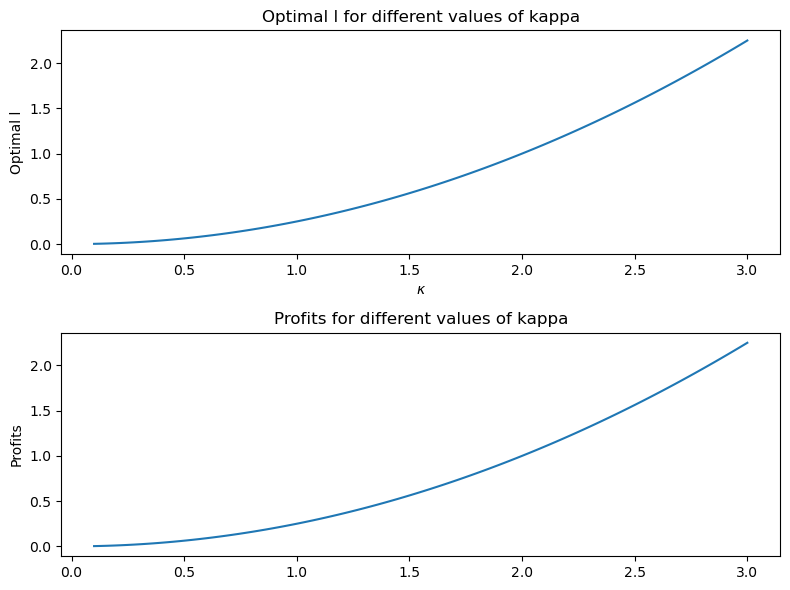

In [14]:
# setting parameters
eta = 0.5
w = 1.0
kappa_values = np.linspace(0.1, 3.0, 100)

# calculating optimal labour and resulting profits
optimal_l_values = ((1 - eta) * kappa_values / w) ** (1 / eta)
profits = kappa_values * optimal_l_values**(1 - eta) - w * optimal_l_values

# Plotting optimal l and profits
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
ax1.plot(kappa_values, optimal_l_values)
ax1.set_xlabel(r'$\kappa$')
ax1.set_ylabel('Optimal l')
ax1.set_title('Optimal l for different values of kappa')

ax2.plot(kappa_values, profits)
ax1.set_xlabel(r'$\kappa$')
ax2.set_ylabel('Profits')
ax2.set_title('Profits for different values of kappa')

plt.tight_layout()
plt.show()


We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$

The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.

Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [ ]:
# define the parameters
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1 / 12)
eta = 0.5
w = 1.0
K = 10000  # Number of shock series for approximation

# generating K random shock series
np.random.seed(2023)  # setting a seed for reproducibility
epsilon_list = np.random.normal(loc=-0.5 * sigma_epsilon ** 2, scale=sigma_epsilon, size=(K, 120))

# function to calculate h(epsilon_0, epsilon_1, ..., epsilon_119)
def calculate_h(epsilon):
    kappa_t_minus_1 = 1  # Initial demand shock
    l_t_minus_1 = 0  # Initial number of employees
    h_value = 0  # Accumulator for h function

    for t in range(120):
        epsilon_t = epsilon[t]
        log_kappa_t = rho * np.log(kappa_t_minus_1) + epsilon_t
        kappa_t = np.exp(log_kappa_t)

        # calculate l_t
        l_t = ((1 - eta) * kappa_t / w) ** (1 / eta)

        # calculate the h function value for this period
        h_value += R ** (-t) * (kappa_t * l_t ** (1 - eta) - w * l_t - (l_t != l_t_minus_1) * iota)

        # update the variables for the next period
        kappa_t_minus_1 = kappa_t
        l_t_minus_1 = l_t

    return h_value

# calculating the ex ante expected value of the salon
H = np.mean([calculate_h(epsilon) for epsilon in epsilon_list])
print("Expected value of the salon (H) =", H)


Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [ ]:
# defining parameter
delta = 0.05

# function to calculate h(epsilon_0, epsilon_1, ..., epsilon_119)
def calculate_h_delta(epsilon, delta):
    kappa_t_minus_1 = 1  # Initial demand shock
    l_t_minus_1 = 0  # Initial number of employees
    h_value = 0  # Accumulator for h function

    for t in range(120):
        epsilon_t = epsilon[t]
        log_kappa_t = rho * np.log(kappa_t_minus_1) + epsilon_t
        kappa_t = np.exp(log_kappa_t)

        # calculating l_t b
        l_t_star = ((1 - eta) * kappa_t / w) ** (1 / eta)

        # implementing policy
        if np.abs(l_t_minus_1 - l_t_star) > delta:
            l_t = l_t_star
        else:
            l_t = l_t_minus_1

        # calculating the h function value for this period
        h_value += R ** (-t) * (kappa_t * l_t ** (1 - eta) - w * l_t - (l_t != l_t_minus_1) * iota)

        # updating the variables for the next period
        kappa_t_minus_1 = kappa_t
        l_t_minus_1 = l_t

    return h_value

# calculating the ex ante expected value of the salon
H = np.mean([calculate_h_delta(epsilon, delta) for epsilon in epsilon_list])
print("Expected value of the salon (H) with the policy =", H)


**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [ ]:
# defining parameter vector
delta_vec = np.linspace(0.01, 0.5, 10)

# calculating H for each delta value
H_vec = []
for delta in delta_vec:
    H = np.mean([calculate_h_delta(epsilon, delta) for epsilon in epsilon_list])
    H_vec.append(H)

# finding the optimal delta value
optimal_delta = delta_vec[np.argmax(H_vec)]
max_H = np.max(H_vec)


In [ ]:
# plotting the results
plt.plot(delta_vec, H_vec)
plt.xlabel("Delta (Δ)")
plt.ylabel("Expected Value of the Salon (H)")
plt.title("Optimization of Delta")
plt.axvline(x=optimal_delta, color='r', linestyle='--', label=f"Optimal Δ: {optimal_delta:.3f}")
plt.legend()
plt.show()

print("Optimal Delta (Δ):", optimal_delta)
print("Maximum Expected Value of the Salon (H):", max_H)


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [ ]:
# function to calculate h(epsilon_0, epsilon_1, ..., epsilon_119)
def calculate_h_iota(epsilon, iota):
    kappa_t_minus_1 = 1  # Initial demand shock
    l_t_minus_1 = 0  # Initial number of employees
    h_value = 0  # Accumulator for h function

    for t in range(120):
        epsilon_t = epsilon[t]
        log_kappa_t = rho * np.log(kappa_t_minus_1) + epsilon_t
        kappa_t = np.exp(log_kappa_t)

        # Calculate l_t based on the policy
        l_t = ((1 - eta) * kappa_t / w) ** (1 / eta)

        if kappa_t >= 0:
            iota = 0.01*kappa_t**0.5
        else:
            iota = 0.01*-kappa_t

        # Calculate the h function value for this period
        h_value += R ** (-t) * (kappa_t * l_t ** (1 - eta) - w * l_t - (l_t != l_t_minus_1) * iota)

        # Update the variables for the next period
        kappa_t_minus_1 = kappa_t
        l_t_minus_1 = l_t

    return h_value

H = np.mean([calculate_h_iota(epsilon, iota) for epsilon in epsilon_list])
print("Expected value of the salon (H) with the policy =", H)


Forklaring: Det er dyrere at fyre end at hyre

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [ ]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.
As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [ ]:
import numpy as np
from scipy.optimize import minimize

def griewank(x):
    return griewank_(x[0], x[1])

def griewank_(x1, x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1)) * np.cos(x2/np.sqrt(2))
    return A - B + 1

In [ ]:


def refined_global_optimizer(bounds, tol, warmup_iters, max_iters):
    # Step 3.E: BFGS optimizer with tolerance `tol`
    def optimizer(x0):
        return minimize(griewank, x0, method='BFGS', tol=tol)

    best_x = None
    x_ast = None

    for k in range(max_iters):
        # Step 3.A: Draw random x^k uniformly within chosen bounds
        x_k = np.random.uniform(bounds[0], bounds[1], size=2)

        if k < warmup_iters:
            x_k0 = x_k  # Step 3.B: Use x^k as the initial guess during warm-up iterations
        else:
            # Step 3.C: Calculate chi^k
            chi_k = 0.50 * (2 / (1 + np.exp((k - warmup_iters) / 100)))

            # Step 3.D: Calculate x_k0 using chi^k and x_ast
            x_k0 = chi_k * x_k + (1 - chi_k) * x_ast

        # Step 3.E: Run optimizer with x_k0 as the initial guess
        result = optimizer(x_k0)

        # Step 3.F: Update x_ast if the result is better
        if x_ast is None or result.fun < griewank(x_ast):
            x_ast = result.x

        # Step 3.G: Check termination condition
        if griewank(x_ast) < tol:
            break

        # Store the effective initial guess for each iteration
        if best_x is None:
            best_x = x_k0
        else:
            best_x = np.vstack((best_x, x_k0))

    return x_ast, best_x

# Define the settings
bounds = [-600, 600]
tol = 1e-8
warmup_iters = 10
max_iters = 1000

# Run the optimizer
x_ast, best_x = refined_global_optimizer(bounds, tol, warmup_iters, max_iters)

# Print the final result
print("Optimal solution:")
print("x_ast:", x_ast)

# Illustrate how the effective initial guesses x_k0 vary with the iteration counter k
print("\nEffective initial guesses:")
for k, x_k0 in enumerate(best_x):
    print("k =", k, ":", x_k0)


In [ ]:
# defining the refined global optimizer with multi-start
def multi_start():

    # step 1
    x_min, x_max = [-600,600] # bounds
    tau = 1e-8 # tolerance
    np.random.seed(1998)

    # step 2
    K_warm = 10 # warm-up iterations
    K = 1000 # maximum nb. of iterations

    # step 3
    # A
    x_opt = np.random.uniform(x_min, x_max, size=2) # initial best solution
    f_opt = griewank(x_opt) # function evaluated at best solution
    f_opt_store1 = [f_opt]  # storing best solutions

    for k in range(K):
        x = np.random.uniform(x_min, x_max, size=2) # generate random solution

        # B
        if k < K_warm:
            x_k0 = x
        else:
            # C: calculate chi
            Chi_k = 0.50 * 2 / (1 + np.exp((k - K_warm) / 100)) 
            # D: refine initial guess
            x_k0 = Chi_k * x + (1 - Chi_k) * x_opt 

        # E: optimize with x_k0 as initial guess
        result = optimize.minimize(griewank, x_k0, method='BFGS', tol=tau)
        x_k_star = result.x # optimized solution

        # F: updating best solution (x_opt) if necessary
        f_k_star = griewank(x_k_star)
        if f_k_star < f_opt:
            x_opt = x_k_star
            f_opt = f_k_star

        # G: check tolerance
        if f_opt < tau:
            break

        f_opt_store1.append(f_opt)  # storing best objective for each iteration

    # step 4 
    return x_opt, f_opt_store1 # return result and stored history

#printing results
result, f_opt_store1 = multi_start()
print("The optimal solution is:", result)
print("And the objective value is:", griewank(result))

# plotting the best objective value as a function of iteration counter
iterations = range(len(f_opt_store1))
plt.plot(iterations, f_opt_store1, c='blue')
plt.xlabel("Iteration count")
plt.ylabel("Function Value")
plt.title("Effectiveness of Initial Guesses")
plt.show()

Implementing the refined global optimizer with multistart indicates that the best objective value is zero after about 150 iterations (when using the chosen seed). 

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [ ]:
# defining the refined global optimizer with multi-start
def multi_start_new():

    # step 1
    x_min, x_max = [-600,600] # bounds
    tau = 1e-8 # tolerance
    np.random.seed(1998)

    # step 2
    K_warm = 100 # warm-up iterations
    K = 1000 # maximum nb. of iterations

    # step 3
    # A
    x_opt = np.random.uniform(x_min, x_max, size=2) # initial best solution
    f_opt = griewank(x_opt) # function evaluated at best solution
    f_opt_store2 = [f_opt]  # storing best solutions

    for k in range(K):
        x = np.random.uniform(x_min, x_max, size=2) # generate random solution

        # B
        if k < K_warm:
            x_k0 = x
        else:
            # C: calculate chi
            Chi_k = 0.50 * 2 / (1 + np.exp((k - K_warm) / 100)) 
            # D: refine initial guess
            x_k0 = Chi_k * x + (1 - Chi_k) * x_opt 

        # E: optimize with x_k0 as initial guess
        result = optimize.minimize(griewank, x_k0, method='BFGS', tol=tau)
        x_k_star = result.x # optimized solution

        # F: updating best solution (x_opt) if necessary
        f_k_star = griewank(x_k_star)
        if f_k_star < f_opt:
            x_opt = x_k_star
            f_opt = f_k_star

        # G: check tolerance
        if f_opt < tau:
            break

        f_opt_store2.append(f_opt)  # storing best objective for each iteration

    # step 4 
    return x_opt, f_opt_store2 # return result and stored history

#printing results
result, f_opt_store2 = multi_start_new()
print("The optimal solution is:", result)
print("And the objective value is:", griewank(result))

# plotting the best objective value as a function of iteration counter
iterations1 = range(len(f_opt_store1))
iterations2 = range(len(f_opt_store2))

plt.plot(iterations1, f_opt_store1, c='blue', label='K=10')
plt.plot(iterations2, f_opt_store2, c='red', label='K=100')

plt.xlabel("Iteration count")
plt.ylabel("Function Value")
plt.title("Effectiveness of Initial Guesses")
plt.legend()
plt.show()

We see that setting a higher value of $\underline{K}$ makes the convergence slower compared to the first case where $\underline{K} = 10$. This might be due to...